# Zener diode series stabilizer

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.WaveForm import OperatingPoint

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction to the Regulator

Before building our circuit, we first need to define the logical blocks that compose it. These blocks are illustrated in [](#bloc_logique_diode_zener).

```{figure} ./images/bloc_logique.svg
:name: bloc_logique_diode_zener
:align: center
:width: 500px

Logical blocks of a regulator
```

We can see that the regulator is made up of four logical blocks. The goal is to eventually construct an electronic circuit that performs voltage regulation.

## Electronic Circuit

The circuit that will be studied is shown in [](#regulateur_tension_simple_circuit):

```{figure} ./images/regulateur_tension_simple_circuit.svg
:name: regulateur_tension_simple_circuit
:align: center
:width: 500px

Simple voltage regulation circuit
```

In this configuration, the voltage regulator is the Zener diode $D_1$, while the control element is the transistor $Q_1$. There is no error detection or output-voltage feedback in this simplified version.

The load resistor $R_L$ represents the output load. In the remainder of the notebook, the goal is to analyze how the system behaves as the load resistance varies. The following sections will develop all the equations governing this system.

The different functional blocks are illustrated in [](#regulateur_tension_simple_circuit_avec_bloc_logique).
It is clear that the entire feedback loop is missing from this simplified regulator.
In the following code, the goal is to analyze the consequences of removing this feedback mechanism.

```{figure} ./images/regulateur_tension_simple_bloc.svg
:name: regulateur_tension_simple_circuit_avec_bloc_logique
:align: center
:width: 500px

Simple voltage regulation circuit with logical blocks
```

## Equations

### Circuit avec une charge

First, the output voltage and current are given by:

$$
U_{\text{out}} = U_{Z1} - U_{BE1}
$$

$$
I_{\text{out}} = \frac{U_{\text{out}}}{R_L}
$$

$$
I_{C1} = I_{\text{out}} \cdot \frac{\beta_{CC}}{\beta_{CC} + 1}
$$

$$
P_{Q1} = (U_{\text{in}} - U_{\text{out}}) \cdot I_{\text{out}} \cdot \frac{\beta_{CC}}{\beta_{CC} + 1}
$$

Two points are especially important to highlight:
1. **The output voltage depends only on two parameters:**
   the Zener diode voltage and the base–emitter voltage drop $U_{BE}$, which is typically around $0.7,\text{V}$.
2. **A key observation** is that the regulation capability relies heavily on how well the Zener maintains its voltage as the load changes.

### Circuit Without Load

When no load is connected, the only change is that the emitter current (I_E) becomes (0).
As a consequence, the base current also becomes (0,\text{A}), and the circuit reduces to a simple loop.
In this situation, the Zener diode dissipates the following power:

$$
P_{D1} = V_\text{Zener} \cdot \frac{V_\text{in} - V_\text{Zener}}{R_1}
$$

In the following sections, the goal is to demonstrate how each of these equations is obtained step by step.

Here is an improved and fully translated English version of your section, with clearer explanations, better structure, and corrected equations.
(I preserved all your derivations, just made them clearer and more rigorous.)

## Demonstration

We begin with the complete circuit used for the derivation, shown in [](#regulateur_tension_simple_circuit_demonstration_complet):

```{figure} ./images/regulateur_tension_simple_demonstration.svg
:name: regulateur_tension_simple_circuit_demonstration_complet
:align: center
:width: 500px

Complete demonstration circuit for the voltage regulator
```

We now detail the derivation of all the electrical equations governing this simple Zener-transistor regulator.


### 1. Mesh 1 — Resistor $R_1$

The first step is to determine the voltage across resistor $R_1$ and the current flowing through it.

From loop 1 we obtain:

$$U_{R1} = U_{\text{in}} - U_{Z1}$$

$$I_{R1} = \frac{U_{R1}}{R_1}$$

### 2. Mesh 2 — Output voltage and load current

From the second loop, the output voltage is:

$$U_{\text{out}} = U_{Z1} - U_{BE1}$$

The load current is:

$$I_{\text{out}} = \frac{U_{\text{out}}}{R_L}$$

Since the emitter of $Q_1$ is directly connected to the load:

$$I_{E1} = I_{\text{out}} = \frac{U_{\text{out}}}{R_L}$$

### 3. Bipolar transistor relations

For a bipolar transistor, we use the standard relationships:

$$I_C = I_E \frac{\beta_{CC}}{\beta_{CC} + 1}$$

$$I_E = I_B + I_C$$

In the context of our circuit:

$$I_{C1} = I_{E1} \frac{\beta_{CC}}{\beta_{CC} + 1}$$

$$I_{B1} = I_{E1} - I_{C1}$$

### 4. Zener diode current

Applying KCL at the Zener node:

$$I_{Z1} = I_{R1} - I_{B1}$$

This expresses the fact that the current through $R_1$ splits between the Zener and the transistor base.

### 5. Voltage across the transistor

The collector–emitter voltage of $Q_1$ is simply:

$$U_{CE1} = U_{\text{in}} - U_{\text{out}}$$

### 6. Power dissipated in the transistor

The instantaneous power is:

$$P_Q = U_{CE} \cdot I_C$$

Thus, for transistor $Q_1$:

$$P_{Q1} = U_{CE1} \cdot I_{C1}$$

Substituting all previously derived expressions:

$$
P_{Q1} = (U_{\text{in}} - U_{\text{out}}), I_{\text{out}},
\frac{\beta_{CC}}{\beta_{CC}+1}
$$

Since:

$$I_{\text{out}} = \frac{U_{\text{out}}}{R_L}$$

and:

$$U_{\text{out}} = U_{Z1} - U_{BE1}$$

we obtain the final compact formula:

$$
P_{Q1}
= (U_{\text{in}} - U_{Z1} + U_{BE1})
\cdot \frac{U_{Z1} - U_{BE1}}{R_L}
\cdot \frac{\beta_{CC}}{\beta_{CC}+1}
$$

This is the full expression of the transistor's power dissipation as a function of:

* input voltage,
* Zener voltage,
* base–emitter voltage,
* load resistance,
* transistor gain $\beta_{CC}$.

## SPICE Simulation 

The next objective is to implement this circuit in SPICE. Before writing the SPICE netlist, we use the following schematic:

```{figure} ./images/regulateur_tension_simple_spice.svg
:name: regulateur_tension_simple_circuit_spice
:align: center
:width: 500px

Simple voltage regulation circuit implemented in SPICE
```

Following this schematic, the SPICE code can be written as follows:

### Creation circuit

In [3]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Stabilisateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 12 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Base Network (Zener Stabilization + Bias Resistor)
# ------------------------------------------------------------
R_base = 1 @ u_kOhm               # Base resistor [Ω]

circuit.R(1, 'collecteur', 'base', R_base)
circuit.R1.minus.add_current_probe(circuit)

# Zener diode for base voltage stabilization
circuit.D('Z', circuit.gnd, 'base', model='DZENER')
circuit.DZ.minus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT('1', 'collecteur', 'base', 'emetteur', model='2N2222A')
circuit.Q1.collector.add_current_probe(circuit)

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]

circuit.R('E', 'emetteur', circuit.gnd, R_emitter);
circuit.RE.minus.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

### Simulation

In [4]:
# ============================================================
# Simulation Setup
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ============================================================
# End of Simulation Setup
# ============================================================

In [5]:
# ============================================================
# Operating Point Analysis
# ============================================================

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

# ------------------------------------------------------------
# Display Node Voltages
# ------------------------------------------------------------
print("=== Node Voltages ===")
for node in analysis.nodes.values():
    print(f"Node {str(node)} : {float(node[0]):4.1f} V")

# ------------------------------------------------------------
# Display Branch Currents
# ------------------------------------------------------------
print("\n=== Branch Currents ===")
for branch in analysis.branches.values():
    print(f"Branch {str(branch)} : {-float(branch[0]) * 1e3:.3f} mA")

# ============================================================
# End of Operating Point Analysis
# ============================================================

=== Node Voltages ===
Node q1#collCX : 12.0 V
Node re_minus :  0.0 V
Node emetteur :  4.5 V
Node q1_collector : 12.0 V
Node dz_anode :  5.2 V
Node base :  5.2 V
Node r1_minus :  5.2 V
Node collecteur : 12.0 V

=== Branch Currents ===
Branch vin : 12.280 mA
Branch vr1_minus : 6.788 mA
Branch vdz_anode : -6.758 mA
Branch vq1_collector : -5.492 mA
Branch vre_minus : 5.522 mA


In [6]:
# ============================================================
# Transistor Electrical Quantities
# ============================================================

# ------------------------------------------------------------
# Power Dissipation in the Transistor
# ------------------------------------------------------------
I_E  = float(analysis.branches["vq1_collector"][0])
V_C  = float(analysis.nodes['collecteur'][0])   # Collector voltage [V]
V_E  = float(analysis.nodes['emetteur'][0])     # Emitter voltage [V]
V_CE = V_C - V_E                                # VCE voltage [V] 
P_Q  = V_CE * I_E                               # Power P = VCE × IE [W]

print("=== Transistor Power ===")
print(f"Pq = {P_Q*1e3:.3f} mW")

# ============================================================
# End of Electrical Quantities
# ============================================================

=== Transistor Power ===
Pq = 41.037 mW


There are two critical aspects to monitor in this circuit: the output voltage of the system and the power dissipated by the transistor. It is essential to check the maximum power the transistor can safely dissipate.

## Theoretical Calculation

The purpose of this section is to perform all the theoretical calculations. This not only allows you to verify your simulations, but also provides the foundations for developing tools that will eventually help you size your electronic circuits more efficiently.                                                                                                                                                                 

In [7]:
# ---- Param initialisation

## Resistance circuit / Ohm
R1    = 1e3
RL    = 820

## Tension / V
U_Z  = 5.6
U_in  = 12

## Parameter transistor
U_BE1 = 0.7
beta  = 100

In [8]:
# ---- Calcul

## Tension / courant in Resitance R1
U_R1 = U_in - U_Z
I_R1 = U_R1 / R1
P_R1 = U_R1 * I_R1

## Tension / courant in Resistance Rout (output)
U_out = U_Z - U_BE1
I_out = U_out / RL

## Tension / courant / puissance transistor
I_E = I_out
I_C = I_E * (beta) / (beta + 1)
I_B = I_E - I_C
U_CE = U_in - U_out
puissance = U_CE * I_C

## Courant transistor zener
I_Z = I_R1 - I_B
P_Z = U_Z * I_Z

In [9]:
print("Resultat théorique")
print("==================\n")

print("Paramètre résistance R1")
print("-----------------------")
print(f"\t- R =  {R1:.3f} Ohm")
print(f"\t- U =  {U_R1:.3f} V")
print(f"\t- I =  {I_R1*1e3:.3f} mA")
print(f"\t- P =  {P_R1*1e3:.3f} mW")

print("Paramètre résistance de charge Rout")
print("-----------------------------------")
print(f"\t- R =  {RL:.3f} Ohm")
print(f"\t- U =  {U_out:.3f} V")
print(f"\t- I =  {I_out*1e3:.3f} mA")

print("Paramètre transistor Q1")
print("-----------------------")
print(f"\t- Ib  =  {I_B*1e3:.3f} mA")
print(f"\t- Ie  =  {I_E*1e3:.3f} mA")
print(f"\t- Ic  =  {I_C*1e3:.3f} mA")
print(f"\t- Uce =  {U_CE:.3f} V")
print(f"\t- P   =  {puissance*1e3:.3f} mW")

print("Paramètre Diode Z")
print("-----------------")
print(f"\t- U =  {U_Z:.3f} V")
print(f"\t- I =  {I_Z*1e3:.3f} mA")
print(f"\t- P =  {P_Z*1e3:.3f} mW")

Resultat théorique

Paramètre résistance R1
-----------------------
	- R =  1000.000 Ohm
	- U =  6.400 V
	- I =  6.400 mA
	- P =  40.960 mW
Paramètre résistance de charge Rout
-----------------------------------
	- R =  820.000 Ohm
	- U =  4.900 V
	- I =  5.976 mA
Paramètre transistor Q1
-----------------------
	- Ib  =  0.059 mA
	- Ie  =  5.976 mA
	- Ic  =  5.916 mA
	- Uce =  7.100 V
	- P   =  42.007 mW
Paramètre Diode Z
-----------------
	- U =  5.600 V
	- I =  6.341 mA
	- P =  35.509 mW


## System Limitations

The objective now is to determine the limitations of the system in order to understand **when this type of circuit can be used** and **when it should absolutely be avoided**.

```{danger}
In the analysis, we only considered the case where the circuit is connected to a load.  
However, it is equally important to examine what happens **when no load is connected**.

In that situation, the emitter current drops to $0 \text{A}$, which means the base–emitter current also becomes $0 \text{A}$. As a result, **the entire base current flows into the Zener diode**, which can lead to **overheating** of the Zener diode $D_1$.

Therefore, this part of the circuit must be carefully designed, and the current in this worst-case scenario must be thoroughly checked.
```

### Evolution of the Output Voltage as a Function of the Output Resistance

The goal is to examine how the circuit’s output voltage changes as the output resistance value is varied.

In [10]:
def calcul_puissance(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by transistor Q1
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the transistor (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Collector current 
    # (SPICE convention: negative value means current entering the device)
    I_C = float(analysis.branches["vq1_collector"][0])

    # Collector and emitter voltages
    V_C = float(analysis.nodes['collecteur'][0])
    V_E = float(analysis.nodes['emetteur'][0])

    # Collector–Emitter voltage
    V_CE = V_C - V_E

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Q = V_CE * I_C    # Power: P = VCE × IC

    return P_Q

In [11]:
def calcul_puissance_diode(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by the Zener diode
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the Zener diode (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Zener diode current
    # (SPICE convention: positive = current flowing from anode to cathode)
    I_DZ = float(analysis.branches["vdz_anode"][0])

    # Voltage at the diode anode (assuming cathode is at ground or fixed node)
    V_DZ = float(analysis.nodes["dz_anode"][0])

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Z = V_DZ * I_DZ       # Power: P = V × I

    return P_Z

In [22]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = 1
end   = 6
num   = 300
R_out = np.logspace(start, end, num)

data      = list()   # correspond à la tension de sortie
puissance = list()   # correspond à la puissance absorbé par le transistor
diode     = list()   # correspond à la puissance absorbé par la diode zener

for Rout in R_out : 
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Stabilisateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 12 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Base Network (Zener Stabilization + Bias Resistor)
    # ------------------------------------------------------------
    R_base = 1 @ u_kOhm               # Base resistor [Ω]
    
    circuit.R(1, 'collecteur', 'base', R_base)
    
    # Zener diode for base voltage stabilization
    circuit.D('Z', circuit.gnd, 'base', model='DZENER')
    circuit.DZ.minus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT('1', 'collecteur', 'base', 'emetteur', model='2N2222A')
    circuit.Q1.collector.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('E', 'emetteur', circuit.gnd, R_emitter)
    circuit.RE.minus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()

    data.append(float(analysis['emetteur'][0]))
    puissance.append(calcul_puissance(analysis))
    diode.append(calcul_puissance_diode(analysis))
    

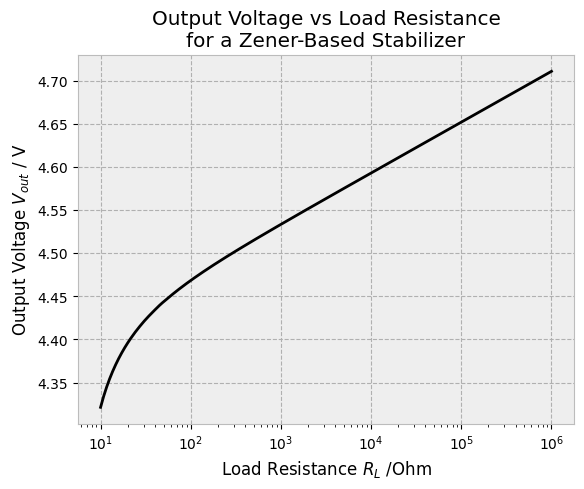

In [23]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Output Voltage vs Load Resistance\n"
    "for a Zener-Based Stabilizer"
)

# Load curve
plt.plot(R_out, np.array(data), "black", linewidth=2)

# Logarithmic scale for the load resistance
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ /Ohm")
plt.ylabel("Output Voltage $V_{out}$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that the output voltage is not truly stable as the load resistance varies. The higher the load resistance $R_L$, the higher the output voltage becomes. Conversely, the lower the load resistance, the lower the output voltage. It is important to note that the relationship $V_\text{out} = f(R_L)$ is not linear.  
The goal of the following sections is to determine whether this behavior can be improved by adding a regulator.

### Evolution of the Power Dissipated in the Zener Diode

The objective is to examine how the power dissipated by the Zener diode varies as a function of the load resistance.

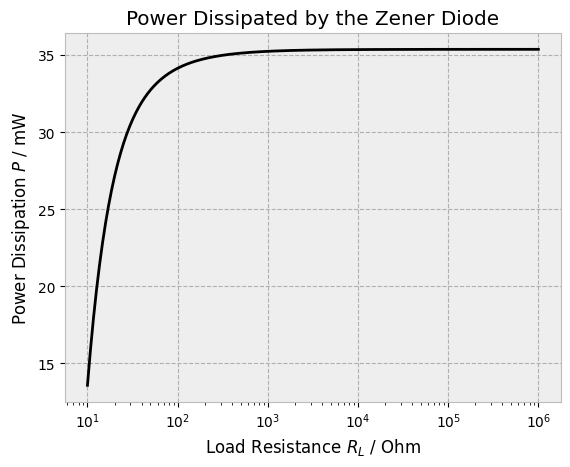

In [24]:
# ============================================================
# Zener Diode Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Zener Diode")

# Power vs load resistance (converted to mW)
plt.plot(R_out, np.array(diode) * 1e3, "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / mW")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

The power dissipated by the diode increases as the load resistance increases. Therefore, it is important to ensure that the diode can handle this power, especially if the system has no load connected.

### Evolution of the Power Dissipated in Transistor $Q_1$ as a Function of the Load Resistance

The objective is to examine how the power dissipated in the transistor changes as the load resistance is varied.

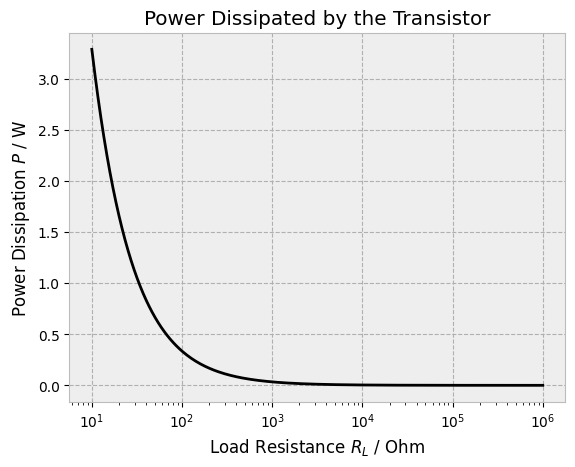

In [25]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissance), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that as the load resistance decreases, the power that the transistor must dissipate increases. This means that particular care is required: when the output is connected to very low-resistance loads, the power dissipated by the transistor can become excessive, potentially damaging the device over time.

Dans la suite de le chapitre *Rajout d'un limiteur de courant* l'objectif est de limité la puissance dissiper lorsque la puissance de charge baisse trop et donc ne pas endommager le trnasistor et par suite la carte électronique.

## Adding a Current Limiter

Figure [](#regulateur_tension_simple_circuit_limiteur_courant) illustrates how a current-limiting stage can be added to the voltage regulator.

```{figure} ./images/regulateur_tension_simple_circuit_limiteur_courant.svg
:name: regulateur_tension_simple_circuit_limiteur_courant
:align: center
:width: 500px

Voltage stabilizer with an integrated current limiter
````

This additional circuit ensures that the output current never exceeds a predefined maximum value.
As a result, when the load resistance becomes very small, the current is automatically restricted. This prevents a large increase in the power dissipated by transistor (Q_1), thereby protecting the device during overload or near-short-circuit conditions.

Overall, the current limiter significantly improves the robustness and safety of the regulator.



### Equations

The following equations describe the behavior of the circuit depending on the operating state of transistor $Q_2$.

#### 1. Transistor in Cutoff (Blocked State)
This occurs when the base–emitter voltage of transistor $Q_2$ is below the conduction threshold:

$$U_{BE2} < 0.7\,\text{V}$$

In this condition, the output voltage is given by:

$$U_{\text{out}} = U_{Z1} - U_{BE1} - R_2 \cdot I_{\text{out}}$$

where the output current is:

$$I_{\text{out}} = \frac{U_{Z1} - U_{BE1}}{R_2 + R_L}$$

#### 2. Transistor in Conduction (Forward-Active Region)

When the base–emitter junction becomes forward biased, the transistor begins to conduct:

$$U_{BE2} > 0.7\,\text{V}$$

The transition between the cutoff region and the conductive region occurs when:

$$U_{R2} = R_2 \cdot \frac{U_{Z1} - U_{BE1}}{R_2 + R_L} > 0.7\,\text{V}$$

$$R_2 = R_L \frac{U_{R2}}{U_{Z1} - U_{BE} - U_{R2}}$$

#### 3. Maximum Output Current

Once the transistor is fully conducting, the maximum output current is limited by resistor $R_2$. It can be expressed as:

$$I_{R2_{\text{max}}} = I_{\text{out}_{\text{max}}} = \frac{U_{BE2}}{R_2}$$

### Demonstration

```{figure} ./images/regulateur_tension_simple_circuit_limiteur_courant_demonstration.svg
:name: regulateur_tension_simple_circuit_limiteur_courant_demonstration
:align: center
:width: 500px

Stabilisateur de tension avec un limiteur de tension (demonstration)
```

#### Transistor $Q_2$ in Cutoff

The transistor $Q_2$ is in cutoff when its base–emitter voltage is below the conduction threshold:

$$U_{BE2} < 0.7\,\text{V}$$

In other words, the voltage across resistor $R_2$ is insufficient to forward-bias the junction.  
Under this condition, both collector and emitter currents of $Q_2$ are zero:

$$I_{C2} = 0$$
$$I_{E2} = 0$$


##### Currents and Voltages in $R_1$

The voltage across resistor $R_1$ is:

$$U_{R1} = U_{in} - U_{Z1}$$

and the associated current is:

$$I_{R1} = \frac{U_{R1}}{R_1}$$

##### Parameters of Transistor $Q_1$

Since $Q_2$ is blocked, the current through $R_2$ is equal to the output current:

$$I_{E1} = I_{R2} = I_{out}$$

The emitter voltage of $Q_1$ is given by the Zener voltage reduced by the base–emitter drop:

$$U_{E1} = U_{Z1} - U_{BE1}$$

Thus, the output current becomes:

$$I_{out} = \frac{U_{E1}}{R_2 + R_L}$$

The base current of $Q_1$ is:

$$I_{B1} = I_{E1} - I_{C1}$$

The collector current is determined from the current gain:

$$I_{C1} = I_{E1} \cdot \frac{\beta}{\beta + 1}$$

The power dissipated in transistor $Q_1$ is:

$$P_{Q1} = U_{CE1} \cdot I_{C1}$$

with:

$$U_{CE1} = U_{in} - U_{E1}$$


##### Output Voltage

Applying Kirchhoff's law along the loop containing the Zener diode, $Q_1$, and the load gives:

$$U_{\text{out}} = U_{Z1} - R_2 \cdot I_{out}$$

##### Zener Diode Current

Using the node equation at the base of transistor $Q_1$:

$$I_{Z1} = I_{R1} - I_{B1}$$


#### Transistor $Q_2$ in the Conducting State

When $Q_2$ becomes active, its base–emitter junction reaches the forward voltage:

$$U_{BE2} = 0.7\,\text{V}$$

Since $Q_2$ is placed in parallel with resistor $R_2$, their voltage must be equal:

$$U_{R2} = U_{BE2} = 0.7\,\text{V}$$

The transition occurs when the voltage across $R_2$ exceeds the conduction threshold. From Ohm’s law:

$$U_{R2} = R_2 \cdot I_{out}$$

and from the previous section:

$$I_{out} = \frac{U_{E1}}{R_2 + R_L}$$

The conduction threshold is reached when:

$$R_2 \cdot \frac{U_{E1}}{R_2 + R_L} > 0.7\,\text{V}$$

At that point, $Q_2$ enters forward conduction.

### Maximum Output Current

Once $Q_2$ is conducting, the maximum current is set by resistor $R_2$:

$$I_{R2_{\text{max}}} = I_{\text{out}_{\text{max}}} = \frac{U_{BE2}}{R_2}$$

The output current cannot exceed this value.  
To validate this operating limit, the circuit can then be simulated using SPICE.

### SPICE Simulation

The corresponding SPICE implementation of the circuit is in the [](#regulateur_tension_simple_circuit_limiteur_courant_spice):

```{figure} ./images/regulateur_tension_simple_circuit_limiteur_courant_spice.svg
:name: regulateur_tension_simple_circuit_limiteur_courant_spice
:align: center
:width: 500px

Voltage stabilizer with a current limiter (SPICE)
```

In [26]:
def calcul_puissance(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by transistor Q1
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the transistor (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Collector current 
    # (SPICE convention: negative value means current entering the device)
    I_C = float(analysis.branches["vq1_collector"][0])

    # Collector and emitter voltages
    V_C = float(analysis.nodes['collecteur'][0])
    V_E = float(analysis.nodes['emetteur'][0])

    # Collector–Emitter voltage
    V_CE = V_C - V_E

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Q = V_CE * I_C    # Power: P = VCE × IC

    return P_Q

In [27]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = -1
end   = 4
num   = 300
R_out = np.logspace(start, end, num)

data      = list()   # correspond à la tension de sortie
puissance = list()   # correspond à la puissance absorbé par le transistor
diode     = list()   # correspond à la puissance absorbé par la diode zener
courant   = list()

for Rout in R_out : 
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Stabilisateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 12 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Base Network (Zener Stabilization + Bias Resistor)
    # ------------------------------------------------------------
    R_base = 1 @ u_kOhm               # Base resistor [Ω]
    
    circuit.R(1, 'collecteur', 'base', R_base)
    
    # Zener diode for base voltage stabilization
    circuit.D('Z', circuit.gnd, 'base', model='DZENER')
    circuit.DZ.minus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
    circuit.Q1.collector.add_current_probe(circuit)


    # ------------------------------------------------------------
    # Courant limitor
    # ------------------------------------------------------------
    R_2 = 3.3 @ u_Ohm               # Base resistor [Ω]
    
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(2, 'base', 'emetteur', 'out', model='2N2222A')
    circuit.R(2, "emetteur", "out", R_2)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('E', 'out', circuit.gnd, R_emitter)
    circuit.RE.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()

    courant.append(float(analysis.branches["vre_plus"][0]))
    data.append(float(analysis['out'][0]))
    puissance.append(calcul_puissance(analysis))
    diode.append(float(analysis.nodes["dz_anode"][0]))#calcul_puissance_diode(analysis))
    

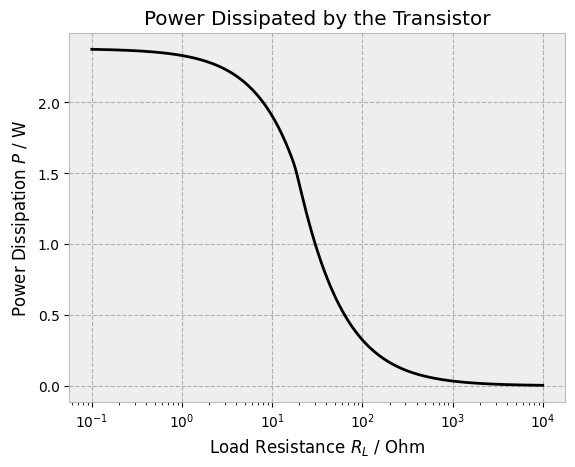

In [28]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissance), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

In this graph, one might wonder what the current limiter actually accomplishes, since the power dissipated by the transistor still increases. However, unlike the configuration without the current limiter, we can now observe the beginning of a power-limiting effect. The limiter does not completely prevent the power from rising, but it significantly slows down its increase once the current approaches the imposed limit.

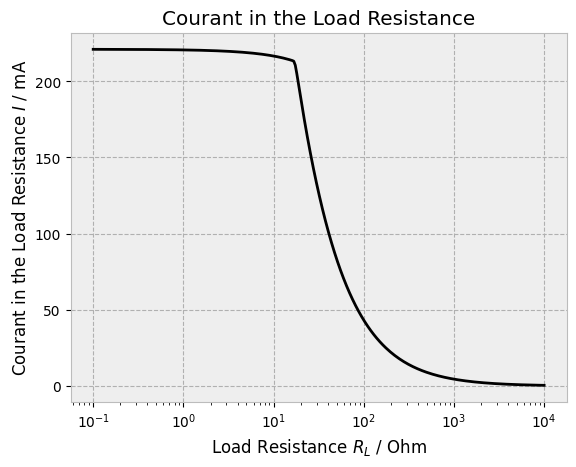

In [29]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(R_out, np.array(courant)*1e3, "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Courant in the Load Resistance $I$ / mA")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that the current through the load resistor is no longer exponential, as it was previously. Instead, it saturates at around $250\,\text{mA}$, meaning the current cannot exceed this limit even if the load resistance continues to decrease. This graph clearly highlights the advantage of this configuration: it effectively protects the circuit from overcurrent conditions.

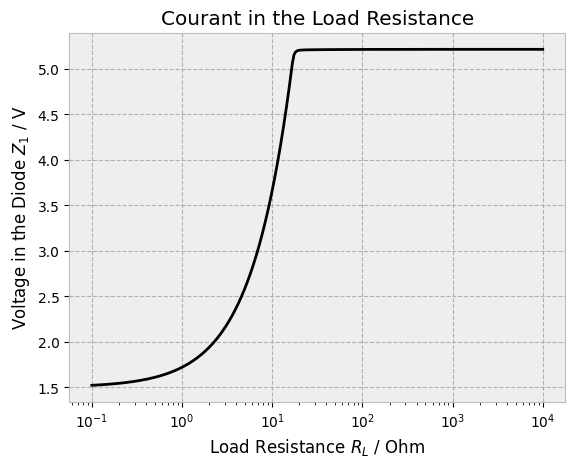

In [30]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(R_out, np.array(diode), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Voltage in the Diode $Z_1$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

As previously discussed, the collector current of transistor $Q_2$ begins to absorb the normal operating current of the Zener diode. This reduction in Zener current causes its voltage to drop. Since the Zener voltage decreases, the output voltage across the load resistor also decreases, which in turn reduces the current delivered to the load. This mechanism provides an additional layer of protection for the circuit by naturally limiting both the Zener stress and the output current.

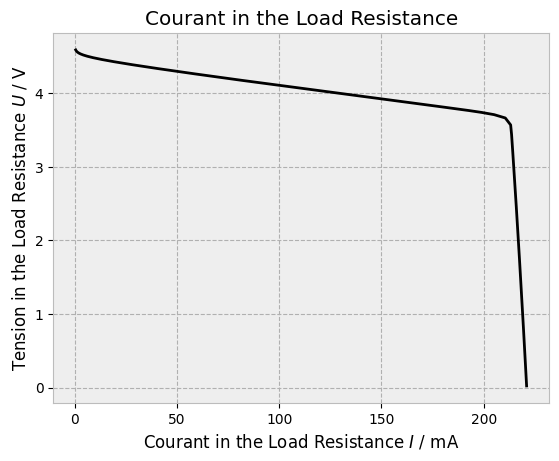

In [31]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(np.array(courant)*1e3, np.array(data), "black", linewidth=2)

# Axis labels
plt.xlabel("Courant in the Load Resistance $I$ / mA")
plt.ylabel("Tension in the Load Resistance $U$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================


This graph is, in my opinion, the most representative one. As soon as the current exceeds a certain threshold, the output voltage drops sharply. This abrupt decrease clearly demonstrates the effectiveness of the current limiter and highlights its importance in protecting the circuit.

## Reference 

* https://www.youtube.com/watch?v=OFG_gaRB-Qw&list=PL1VxGOb3XYh1QD4sxYYAMfiksop7V4v1E&index=12